In [93]:
import pandas as pd
import numpy as np
import csv 
from scipy import stats as sp
import statsmodels

In [94]:
df = pd.read_csv('results_normal.csv')

wrong_ips = ['2d2e527554296b7ac61cd81b386750a3',
             '68a5f30804bb182eafc9aba1e3a978f3',
             'f22bc56aad1bc122b31322a6a09ec2f6']

for wrong in wrong_ips:
    df = df.drop(df.loc[df.ip == wrong].index)
    
df

,reception_time,ip,label,sentence,answer,time
37,1636885041,5da1ea2b070a8ad78c47b1257c7ef58d,id.pozv.pass.a,Серёжка думал%2C поселить ли у себя в комнате ...,5,21148
38,1636885041,5da1ea2b070a8ad78c47b1257c7ef58d,id.zast.act.b,Напряженное молчание заставляло атмосферу сгущ...,7,4910
39,1636885041,5da1ea2b070a8ad78c47b1257c7ef58d,id.mesh.pass.a,Хорошее воспитание не мешало грехам водиться з...,4,5932
40,1636885041,5da1ea2b070a8ad78c47b1257c7ef58d,id.zast.pass.a,Приход в администрацию нового руководства заст...,5,7280
41,1636885041,5da1ea2b070a8ad78c47b1257c7ef58d,id.pozv.act.b,В команде проекта собрались отличные компетент...,6,75611
...,...,...,...,...,...,...
656,1637320461,50e8489de504ee406f46efe0ba6015e9,id.pozv.pass.a,Серёжка думал%2C поселить ли у себя в комнате ...,5,33456
657,1637320461,50e8489de504ee406f46efe0ba6015e9,id.pomo.pass.a,Новые запретительные меры помогли гайкам закру...,7,4910
658,1637320461,50e8489de504ee406f46efe0ba6015e9,id.pomo.act.b,Алёна была в ярости%2C когда узнала%2C где муж...,7,9555
659,1637320461,50e8489de504ee406f46efe0ba6015e9,id.zast.pass.a,Приход в администрацию нового руководства заст...,7,5174


In [2]:
df = pd.read_csv('results_normal.csv')
df

,reception_time,ip,label,sentence,answer,time
0,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,id.mesh.pass.a,Хорошее воспитание не мешало грехам водиться з...,4,411
1,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,id.pomo.act.a,Следователи были в полном замешательстве%2C но...,4,408
2,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,id.zast.act.b,Напряженное молчание заставляло атмосферу сгущ...,4,409
3,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,id.pozv.pass.b,Школьная директриса Лариса Эдуардовна была сто...,4,384
4,1636881140,f22bc56aad1bc122b31322a6a09ec2f6,id.mesh.pass.b,Родительский контроль должен мешать головам де...,4,742
...,...,...,...,...,...,...
656,1637320461,50e8489de504ee406f46efe0ba6015e9,id.pozv.pass.a,Серёжка думал%2C поселить ли у себя в комнате ...,5,33456
657,1637320461,50e8489de504ee406f46efe0ba6015e9,id.pomo.pass.a,Новые запретительные меры помогли гайкам закру...,7,4910
658,1637320461,50e8489de504ee406f46efe0ba6015e9,id.pomo.act.b,Алёна была в ярости%2C когда узнала%2C где муж...,7,9555
659,1637320461,50e8489de504ee406f46efe0ba6015e9,id.zast.pass.a,Приход в администрацию нового руководства заст...,7,5174


In [95]:
voice = [row['label'].split('.')[2] for i, row in df.iterrows()]
df['voice'] = voice

In [96]:
case = []

for i, row in df.iterrows():
    verb = row['label'].split('.')[1]
    if verb in ['mesh', 'pomo', 'pozv']:
        case.append('dat')
    else:
        case.append('acc')

df['case'] = case

In [97]:
table = df[['answer', 'voice', 'case']].copy()
table

,answer,voice,case
37,5,pass,dat
38,7,act,acc
39,4,pass,dat
40,5,pass,acc
41,6,act,dat
...,...,...,...
656,5,pass,dat
657,7,pass,dat
658,7,act,dat
659,7,pass,acc


In [98]:
data = pd.get_dummies(table)
data['time'] = list(df['time'])
data

,answer,voice_act,voice_pass,case_acc,case_dat,time
37,5,0,1,0,1,21148
38,7,1,0,1,0,4910
39,4,0,1,0,1,5932
40,5,0,1,1,0,7280
41,6,1,0,0,1,75611
...,...,...,...,...,...,...
656,5,0,1,0,1,33456
657,7,0,1,0,1,4910
658,7,1,0,0,1,9555
659,7,0,1,1,0,5174


In [99]:
from sklearn import linear_model

x = data[['voice_act', 'case_acc']]
y = data['answer']

x_train = x[:-100]
x_test = x[-100:]

y_train = y[:-100]
y_test = y[-100:]

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.23499987 -0.32203346]
Mean squared error: 2.57
Coefficient of determination: -0.58


<AxesSubplot:xlabel='voice_act', ylabel='answer'>

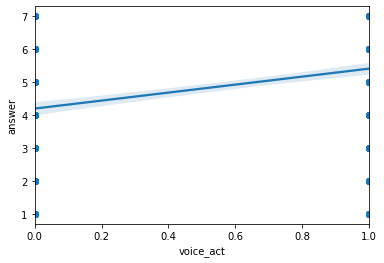

In [9]:
sns.regplot(x='voice_act', y='answer', data=data)

<AxesSubplot:xlabel='case_dat', ylabel='answer'>

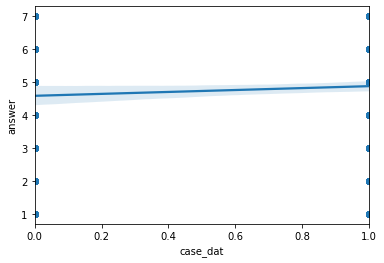

In [10]:
sns.regplot(x='case_dat', y='answer', data=data)

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
xt = poly.fit_transform(x)

regr = linear_model.LinearRegression()
regr.fit(xt, y)
coefs = [round(coef, 3) for coef in regr.coef_]
print("Coefficients: \n", coefs)
print(f'{coefs[0]}*VOICE_ACT + {coefs[1]}*CASE_ACC + {coefs[2]}*VOICE_ACT*CASE_ACC')

Coefficients: 
 [1.271, -0.171, -0.234]
1.271*VOICE_ACT + -0.171*CASE_ACC + -0.234*VOICE_ACT*CASE_ACC


- плюс active voice
- немножко минус аккузативное управление глагола(
- немножко минус acc\*act

<AxesSubplot:xlabel='voice_act', ylabel='case_dat'>

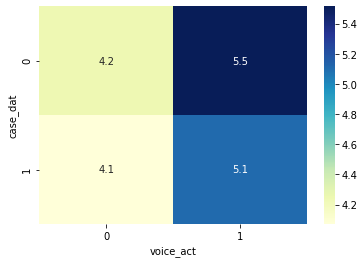

In [12]:
# voice_act, case_acc

def predict(voice, case):
    return regr.predict(np.array([[voice, case, voice*case]]))

prds = []
for voice in [0, 1]:
    for case in [0, 1]:
        prd = {}
        prd['voice_act'] = voice
        prd['case_dat'] = case
        prd['prediction'] = predict(voice, case)
        prds.append(prd)
        
prd = pd.DataFrame.from_dict(prds)

table = pd.pivot_table(prd, values='prediction', index=['case_dat'],
                       columns=['voice_act'], aggfunc=np.sum)

sns.heatmap(table,annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='case_acc', ylabel='answer'>

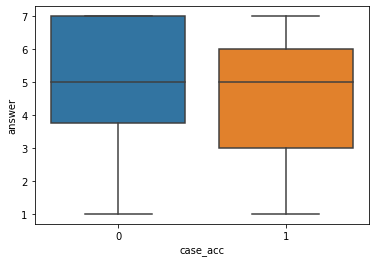

In [13]:
sns.boxplot(y='answer', x='case_acc',data=data)

<AxesSubplot:xlabel='voice_pass', ylabel='answer'>

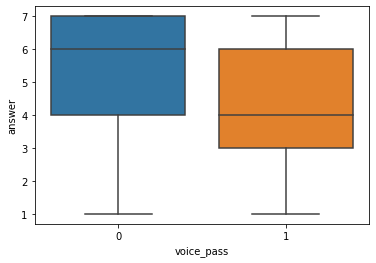

In [14]:
sns.boxplot(y='answer', x='voice_pass',data=data)

<AxesSubplot:>

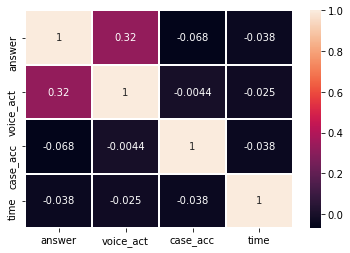

In [15]:
sns.heatmap(data[['answer', 'voice_act', 'case_acc', 'time']].corr(),annot=True,lw=1)

- от предиката ничего не зависит
- без пассивизации лучше, но немного

In [16]:
keys = ['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']
describe = []

for label in df['label'].unique():
    desc = {}
    desc['label'] = label
    for i, ele in enumerate(sp.describe(df.loc[df['label'] == label]['answer'])):
        desc[keys[i]] = ele
    describe.append(desc)
        
describe = pd.DataFrame.from_dict(describe)
describe.sort_values('mean')

,label,nobs,minmax,mean,variance,skewness,kurtosis
8,id.zast.pass.b,40,"(1, 7)",3.525000,3.589103,0.178545,-0.970092
0,id.mesh.pass.a,43,"(1, 7)",3.558140,4.204873,0.192267,-1.160697
10,id.pomo.pass.a,43,"(1, 7)",3.883721,4.057586,-0.086905,-1.153034
3,id.pozv.pass.b,40,"(1, 7)",4.025000,2.948077,0.207134,-0.850011
4,id.mesh.pass.b,40,"(2, 7)",4.375000,2.137821,0.225084,-0.921448
14,id.pomo.pass.b,39,"(1, 7)",4.435897,4.094467,-0.147034,-1.157172
11,id.mesh.act.a,41,"(1, 7)",4.463415,2.654878,-0.460581,-0.679804
5,id.zast.pass.a,43,"(1, 7)",4.581395,3.344408,-0.474439,-0.591101
2,id.zast.act.b,43,"(1, 7)",4.976744,3.499446,-0.606281,-0.804039
13,id.pozv.pass.a,42,"(1, 7)",5.214286,2.855401,-0.555996,-0.720671


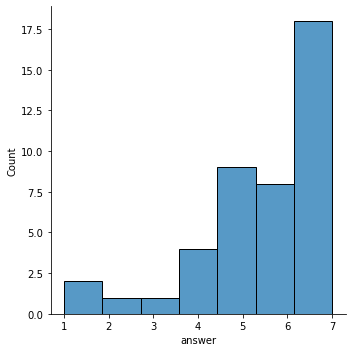

In [17]:
sns.displot(df.loc[df['label'] == 'id.pozv.act.b'], x="answer")

In [18]:
ff = pd.read_csv('fillers_normal.csv')

In [19]:
gram = []
gram_F = []

for i, row in ff.iterrows():
    gr = row['label'].split('-')[0]
    gram_F.append(gr)
    if gr == 'Fu':
        gram.append(0)
    else:
        gram.append(1)

ff['gram'] = gram

ff['gram_F'] = gram_F

ff

,reception_time,ip,label,sentence,answer,time,gram,gram_F
0,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,Fu-1F.01,Анечка совсем не хотела есть суп%2C потому что...,4,2672,0,Fu
1,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,Fg-1F.01,Если бы не дождь с градом%2C я бы пошла сегодн...,4,820,1,Fg
2,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,Fu-3F.01,Дома холодные полы%2C поэтому бабушка настаива...,4,599,0,Fu
3,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,Fg-3F.02,Курины уехали на дачу на две недели%2C и до ни...,4,462,1,Fg
4,1636880892,f22bc56aad1bc122b31322a6a09ec2f6,Fu-4F.01,Дедлайн стремительно приближался%2C а я успева...,4,557,0,Fu
...,...,...,...,...,...,...,...,...
1394,1637320461,50e8489de504ee406f46efe0ba6015e9,Fg-2F.01,Алёше уже не нужны костыли – его нога совсем з...,7,4793,1,Fg
1395,1637320461,50e8489de504ee406f46efe0ba6015e9,Fu-7F.02,Дойдя до вертолётной площадки%2C мы повернулис...,6,15253,0,Fu
1396,1637320461,50e8489de504ee406f46efe0ba6015e9,Fg-4F.01,Химия так плохо давалась Насте%2C что пришлось...,7,5973,1,Fg
1397,1637320461,50e8489de504ee406f46efe0ba6015e9,Fu-1F.02,Все были взволнованы после ухода Петра Степано...,5,8675,0,Fu


<AxesSubplot:xlabel='gram_F', ylabel='answer'>

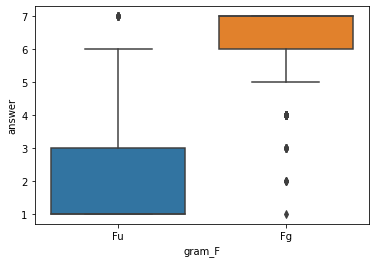

In [20]:
sns.boxplot(y='answer', x='gram_F',data=ff)

<AxesSubplot:>

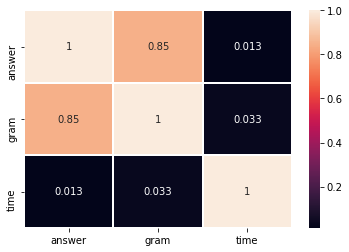

In [21]:
sns.heatmap(ff[['answer', 'gram', 'time']].corr(),annot=True,lw=1)

In [22]:
keys = ['nobs', 'minmax', 'mean', 'variance', 'skewness', 'kurtosis']
describe = []

for label in ff['label'].unique():
    desc = {}
    desc['label'] = label
    for i, ele in enumerate(sp.describe(ff.loc[ff['label'] == label]['answer'])):
        desc[keys[i]] = ele
    describe.append(desc)
        
describe = pd.DataFrame.from_dict(describe)
describe.sort_values(by='mean')

,label,nobs,minmax,mean,variance,skewness,kurtosis
20,Fu-5F.02,45,"(1, 5)",1.488889,1.028283,2.080430,3.242525
24,Fu-3F.02,45,"(1, 5)",1.644444,1.097980,1.589282,1.584523
18,Fu-6F.01,45,"(1, 5)",1.711111,1.528283,1.658898,1.444355
30,Fu-4F.02,42,"(1, 7)",1.809524,1.865273,2.093008,4.137113
6,Fu-8F.01,45,"(1, 7)",1.822222,2.058586,1.809717,2.661276
0,Fu-1F.01,43,"(1, 7)",1.930233,2.209302,1.617186,1.953205
4,Fu-4F.01,45,"(1, 7)",1.955556,1.952525,1.596052,2.259629
26,Fu-7F.01,43,"(1, 7)",1.976744,2.594684,1.594378,1.440427
12,Fu-7F.02,45,"(1, 6)",1.977778,1.840404,1.200416,0.351297
16,Fu-5F.01,42,"(1, 7)",2.000000,2.097561,1.560193,1.985938


убрать тех, кто отвечал стремновато

In [23]:
ips = pd.pivot_table(ff, values='answer', index='ip', columns='gram_F', aggfunc=np.average)
ips['test'] = [np.average(df.loc[df['ip'] == ip[0]]['answer']) for ip in ips.iterrows()]
ips

gram_F,Fg,Fu,test
ip,,,
0024f1dcc9a891a6024b5a81d42914e6,7.000,2.250,6.750
033a51caed67a056c4debc1ecd3f364a,7.000,1.000,3.250
06faba9f8087061dd4704ff9f3b723b9,6.375,1.125,3.750
1896cf933c44ea996fc3963cb37fd3ef,6.000,2.250,4.500
1b8c2a9f89469afca854613d2bd8b775,6.375,1.000,4.375
...,...,...,...
f39027d9ea86ae47d12f2de08710639b,7.000,1.000,4.000
f4739202d6bf1f8a6d8bc8602c2195f9,6.750,2.875,5.625
f52d52a60e2efb6bf6840870d5037d4e,5.500,2.250,4.000


In [24]:
d = [row[1]['Fg'] - row[1]['Fu'] for row in ips.iterrows()]
    
ips['difference'] = d
ips.sort_values('Fu')

gram_F,Fg,Fu,test,difference
ip,,,,
7cc9b7622c1284bac995f9d58ac07971,6.750000,1.000000,3.125,5.750000
75b92c48a07493173cf649cad1907d4f,6.625000,1.000000,5.750,5.625000
6f74cbcb9a8c1e2a8d70756d8585b49a,6.750000,1.000000,4.125,5.750000
5da1ea2b070a8ad78c47b1257c7ef58d,6.875000,1.000000,5.500,5.875000
94dc5a2f2511bd53d930eb1716c77e47,7.000000,1.000000,6.000,6.000000
...,...,...,...,...
6988e1589031638a170d3fa9a4fc8906,6.500000,3.375000,6.125,3.125000
af04f8e3d45d88f04d93a044d680ff86,6.375000,3.375000,4.625,3.000000
ec30c6c5277c6850ce4c9652a395a553,6.875000,3.375000,5.375,3.500000


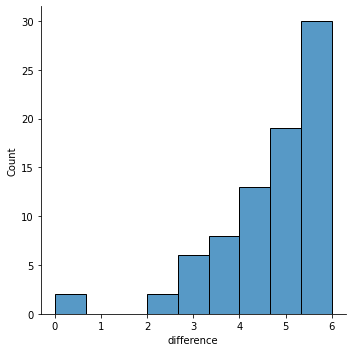

In [25]:
sns.displot(ips, x="difference")

In [28]:
bad = []

for row in ips.loc[(ips['Fg'] <= 4) | (ips['Fu'] >= 4)].iterrows():
    bad.append(row[0])
    
len(bad)
bad

['2d2e527554296b7ac61cd81b386750a3',
 '68a5f30804bb182eafc9aba1e3a978f3',
 'f22bc56aad1bc122b31322a6a09ec2f6']

In [100]:
#zscores = df[['ip', 'label', 'answer']]
scores = pd.pivot_table(df, values='answer', index=['ip'],
                       columns=['label'])

d = sp.zscore(scores, nan_policy='omit')
labels = scores.columns
ips = scores.index
zscores = pd.DataFrame(d, index=ips, columns=labels)
zscores = pd.DataFrame(zscores.to_records())
zscores

,ip,id.mesh.act.a,id.mesh.act.b,id.mesh.pass.a,id.mesh.pass.b,id.pomo.act.a,id.pomo.act.b,id.pomo.pass.a,id.pomo.pass.b,id.pozv.act.a,id.pozv.act.b,id.pozv.pass.a,id.pozv.pass.b,id.zast.act.a,id.zast.act.b,id.zast.pass.a,id.zast.pass.b
0,0024f1dcc9a891a6024b5a81d42914e6,NaN,0.911446,1.651186,NaN,NaN,-0.679260,1.533790,NaN,NaN,0.816497,1.046952,NaN,NaN,1.046625,1.293851,NaN
1,033a51caed67a056c4debc1ecd3f364a,NaN,-2.286610,-1.262672,NaN,NaN,-0.679260,-1.458971,NaN,NaN,0.816497,-0.132712,NaN,NaN,-1.186175,-1.518869,NaN
2,06faba9f8087061dd4704ff9f3b723b9,NaN,-1.646999,-1.262672,NaN,NaN,-1.455556,-0.960177,NaN,NaN,-1.224745,1.046952,NaN,NaN,-1.186175,0.731307,NaN
3,1896cf933c44ea996fc3963cb37fd3ef,-0.828514,NaN,NaN,0.491178,0.848620,NaN,NaN,-0.175420,-2.179125,NaN,NaN,-0.546119,-0.731538,NaN,NaN,1.456052
4,1b8c2a9f89469afca854613d2bd8b775,NaN,-1.007388,0.679900,NaN,NaN,-0.679260,-0.461384,NaN,NaN,-0.544331,-1.312376,NaN,NaN,-0.069775,0.168763,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,f39027d9ea86ae47d12f2de08710639b,-0.215414,NaN,NaN,-0.906791,-1.073764,NaN,NaN,-0.175420,-1.195862,NaN,NaN,-0.546119,1.072923,NaN,NaN,-0.742884
73,f4739202d6bf1f8a6d8bc8602c2195f9,1.010788,NaN,NaN,0.491178,0.848620,NaN,NaN,0.823123,-1.195862,NaN,NaN,1.236798,1.072923,NaN,NaN,-0.193150
74,f52d52a60e2efb6bf6840870d5037d4e,1.010788,NaN,NaN,-0.906791,0.848620,NaN,NaN,-1.173962,0.770666,NaN,NaN,-0.546119,-1.333025,NaN,NaN,-1.292618
75,f55fbb21e32f6b727eba6ed78263b502,1.010788,NaN,NaN,1.190163,0.207825,NaN,NaN,1.322394,0.770666,NaN,NaN,0.642493,-0.731538,NaN,NaN,0.356584


In [101]:
predummies = zscores.melt(id_vars=['ip'], value_vars=labels)
predummies = predummies.rename(columns={'variable':'label'})

voice = [row['label'].split('.')[2] for i, row in predummies.iterrows()]
predummies['voice'] = voice

case = []

for i, row in predummies.iterrows():
    verb = row['label'].split('.')[1]
    if verb in ['mesh', 'pomo', 'pozv']:
        case.append('dat')
    else:
        case.append('acc')

predummies['case'] = case

dummies = pd.get_dummies(predummies[['value', 'voice', 'case']])
dummies = dummies.drop(dummies[np.isnan(dummies['value'])].index)
dummies['value'] = dummies['value'].multiply(1)
dummies

,value,voice_act,voice_pass,case_acc,case_dat
3,-0.828514,1,0,0,1
8,0.397687,1,0,0,1
10,1.010788,1,0,0,1
12,1.010788,1,0,0,1
14,0.397687,1,0,0,1
...,...,...,...,...,...
1227,-0.742884,0,1,1,0
1228,-0.193150,0,1,1,0
1229,-1.292618,0,1,1,0
1230,0.356584,0,1,1,0


Coefficients: 
 [ 2.94868184e-17 -6.33143424e-02]
Mean squared error: 1.00
Coefficient of determination: -0.01
Coefficients: 
 [0.0, -0.0, 0.0]
0.0*VOICE_ACT + -0.0*CASE_ACC + 0.0*VOICE_ACT*CASE_ACC


<AxesSubplot:xlabel='voice_act', ylabel='case_dat'>

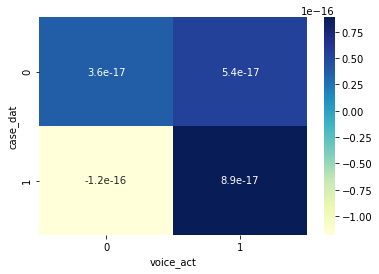

In [102]:
x = dummies[['voice_act', 'case_acc']]
y = dummies['value']

x_train = x[:-100]
x_test = x[-100:]

y_train = y[:-100]
y_test = y[-100:]

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train, )

y_pred = regr.predict(x_test)

print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# voice_act, case_acc

def predict(voice, case):
    return regr.predict(np.array([[voice, case, voice*case]]))

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
xt = poly.fit_transform(x)

regr = linear_model.LinearRegression()
regr.fit(xt, y)
coefs = [round(coef, 3) for coef in regr.coef_]
print("Coefficients: \n", coefs)
print(f'{coefs[0]}*VOICE_ACT + {coefs[1]}*CASE_ACC + {coefs[2]}*VOICE_ACT*CASE_ACC')

prds = []
for voice in [0, 1]:
    for case in [0, 1]:
        prd = {}
        prd['voice_act'] = voice
        prd['case_dat'] = case
        prd['prediction'] = predict(voice, case)
        prds.append(prd)
        
prd = pd.DataFrame.from_dict(prds)

table = pd.pivot_table(prd, values='prediction', index=['case_dat'],
                       columns=['voice_act'], aggfunc=np.sum)

sns.heatmap(table, annot=True,cmap="YlGnBu")

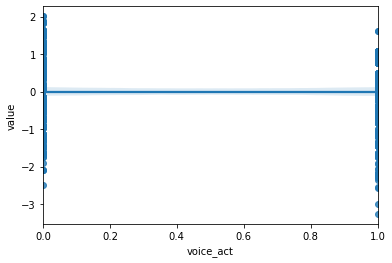

In [103]:
sns.regplot(x='voice_act', y='value', data=dummies)
plt.savefig('voice_reg')

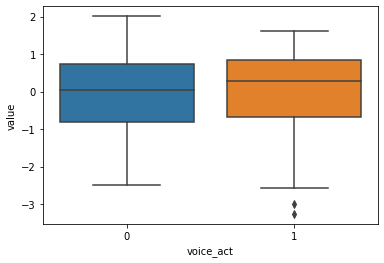

In [104]:
sns.boxplot(x='voice_act', y='value', data=dummies)
plt.savefig('voice_box')

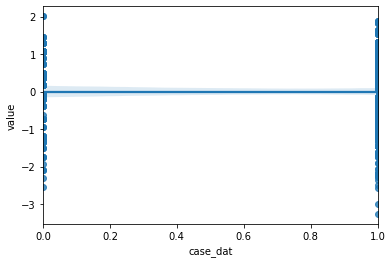

In [105]:
sns.regplot(x='case_dat', y='value', data=dummies)
plt.savefig('case_reg')

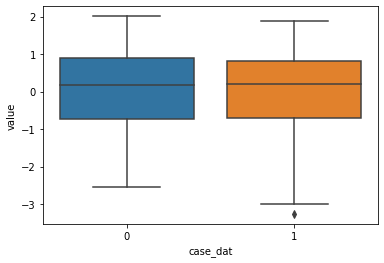

In [106]:
sns.boxplot(x='case_dat', y='value', data=dummies)
plt.savefig('case_box')

In [107]:
sp.ttest_ind(dummies['case_dat'], dummies['value'])[1] * 10**59>

8.731328594454656

/Users/shikunova/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


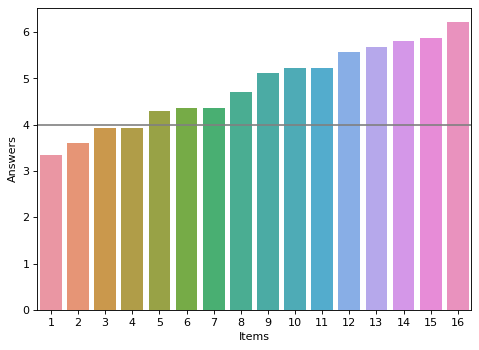

In [108]:
l = sorted([np.mean(df.loc[df['label'] == label]['answer']) for label in df['label'].unique()])
x = list(range(1, 17))

from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

sns.barplot(x, l)
plt.axhline(y=4, color='grey')

plt.ylabel('Answers')
plt.xlabel('Items')

plt.savefig('items')

In [88]:
l = sorted([np.mean(df.loc[df['label'] == label]['answer']) for label in df['label'].unique()])
range(16)

range(0, 16)